**Below is the steps we would go through to load, view and visualize any csv data.**  
  
**STEP 1: ADDING PACKAGES**  
  
**We add python packages we require.**  

In [22]:
import numpy  as np             # easy to play with arrays etc.
import pandas as pd             # required to load and read data and put in dataframe.
import matplotlib.pyplot as plt # required for data visualization purposes.
import seaborn as sns           # required for data visualization purposes.
import plotly.plotly as py      # required for data visualization purposes.
import plotly.graph_objs as go  # required for data visualization purposes.
from IPython.display import display, HTML
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

**STEP 2: READING IN A DATASET**  
  
**To read data in the form of .xls or comma seperated file, you need pd.read_excel()**  

**Delimiter can be set as well whether header or index column is required.**  

**http://gsociology.icaap.org/dataupload.html is source of data**  
    

****


**STEP 3: VIEWING THE FIRST FEW ROWS**  
  

**To see the first few rows of the data and make sure we read it in correctly, we use .head()**


In [23]:
excel_file = "../Desktop/Causes_of_Death.xls"
data = pd.read_excel(excel_file)
data.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2755,55.5
1,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,439,63.1
2,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4010,54.2
3,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1604,51.8
4,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13213,32.0


**STEP 4: GET BASIC INFORMATION**  
  
**To get basic info from the dataset, we use .info()**

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 6 columns):
Year                       10296 non-null int64
113 Cause Name             10296 non-null object
Cause Name                 10296 non-null object
State                      10296 non-null object
Deaths                     10296 non-null int64
Age-adjusted Death Rate    10296 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 482.7+ KB


**STEP 5: SEE FURTHER DETAILS**  
  
**To get datatypes of each column, we can use .dtypes**  

**To get more details about each column, we can use .describe()**  
  
The reason we only get data from 3 columns is because the rest have commas in them which need to be removed
We can deal with this later while cleaning.

In [25]:
print data.dtypes
print "\n"
display(HTML(data.describe().to_html()))

Year                         int64
113 Cause Name              object
Cause Name                  object
State                       object
Deaths                       int64
Age-adjusted Death Rate    float64
dtype: object




,Year,Deaths,Age-adjusted Death Rate
count,10296.000000,1.029600e+04,10296.000000
mean,2007.500000,1.532668e+04,128.026428
std,5.188379,1.112160e+05,224.355281
min,1999.000000,2.100000e+01,2.600000
25%,2003.000000,6.060000e+02,19.200000
50%,2007.500000,1.704500e+03,35.800000
75%,2012.000000,5.678000e+03,153.025000
max,2016.000000,2.712630e+06,1087.300000



**STEP 6: COUNT NUMBER OF EMPTY VALUES IN COLUMN**  
   
**We can check the number of null values a column has by using .isnull().sum()**  
  
**For example, here, Climate has the most null values **  

In [26]:
print data.isnull().sum()

Year                       0
113 Cause Name             0
Cause Name                 0
State                      0
Deaths                     0
Age-adjusted Death Rate    0
dtype: int64


**STEP 7: SEE NUMBER OF UNIQUE VALUES IN COLUMN**  
  
**It is useful to see the number of unique values in each column using .nunique()**  
  
**Here we see region and climate have a good number of unique values to order by, therefore we can group by these columns and make good visualizations**  

In [41]:
print data.nunique()
group1 = data.groupby("Cause Name")['Age-adjusted Death Rate'].agg(np.mean)
print group1
print "\n"
group2 = data.groupby("Year")
display(HTML(group2.head().to_html()))
print "\n"
group3 = data.groupby("State")
display(HTML(group3.head().to_html()))

Year                         18
113 Cause Name               11
Cause Name                   11
State                        52
Deaths                     5741
Age-adjusted Death Rate    2419
Cause_Name                   11
dtype: int64
Cause Name
All causes                 800.924252
Alzheimer's disease         24.618697
CLRD                        44.644658
Cancer                     179.898825
Diabetes                    23.471902
Heart disease              199.782372
Influenza and pneumonia     18.389103
Kidney disease              14.139423
Stroke                      46.358333
Suicide                     13.235470
Unintentional injuries      42.827671
Name: Age-adjusted Death Rate, dtype: float64




,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate,Cause_Name
0,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2755,55.5,Unintentional injuries
1,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,439,63.1,Unintentional injuries
2,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4010,54.2,Unintentional injuries
3,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1604,51.8,Unintentional injuries
4,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13213,32.0,Unintentional injuries
36,2006,All Causes,All causes,Alaska,3354,787.6,All causes
53,2015,All Causes,All causes,Alabama,51909,924.5,All causes
54,2014,All Causes,All causes,Alabama,50215,909.1,All causes
55,2013,All Causes,All causes,Alabama,50189,925.2,All causes
56,2012,All Causes,All causes,Alabama,49301,926.7,All causes


,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate,Cause_Name
0,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2755,55.5,Unintentional injuries
1,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,439,63.1,Unintentional injuries
2,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4010,54.2,Unintentional injuries
3,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1604,51.8,Unintentional injuries
4,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13213,32.0,Unintentional injuries
5,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Colorado,2880,51.2,Unintentional injuries
6,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Connecticut,1978,50.3,Unintentional injuries
7,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Delaware,516,52.4,Unintentional injuries
8,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,District of Columbia,401,58.3,Unintentional injuries
9,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Florida,12561,54.9,Unintentional injuries


**STEP 8: PLOT WHOLE DATESET**  
  
**Let us try to visualize all the data at once**  
  
**After that, we count the number of countries in each region and plot it and do the same for climate. **  

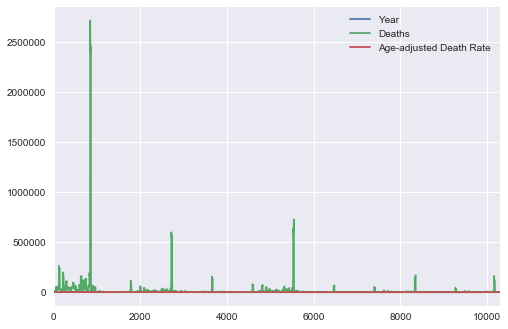

In [28]:
a = data.plot()
plt.show()

**STEP 9: NUMBER OF OCCURANCES OF EACH VALUE IN COLUMN**  
  
**A good way to visualize data of a column you wish to group by is to use .value_counts()**  
  
**It gives a clear picture of how many would be in each group etc.**  

In [38]:
data['Cause_Name']=data['Cause Name']
print data.Cause_Name.head()
region = data.Cause_Name.value_counts()
print region
climate = data.Year.value_counts()
print climate

0    Unintentional injuries
1    Unintentional injuries
2    Unintentional injuries
3    Unintentional injuries
4    Unintentional injuries
Name: Cause_Name, dtype: object
All causes                 936
Stroke                     936
Kidney disease             936
Unintentional injuries     936
Cancer                     936
CLRD                       936
Suicide                    936
Influenza and pneumonia    936
Diabetes                   936
Heart disease              936
Alzheimer's disease        936
Name: Cause_Name, dtype: int64
2015    572
2007    572
2008    572
2016    572
2001    572
2009    572
2002    572
2010    572
2003    572
2011    572
2004    572
2012    572
2005    572
2013    572
2006    572
2014    572
1999    572
2000    572
Name: Year, dtype: int64


**STEP 10: VISUALIZATION**  
  
**Using matplotlib.pyplot to make bar charts**

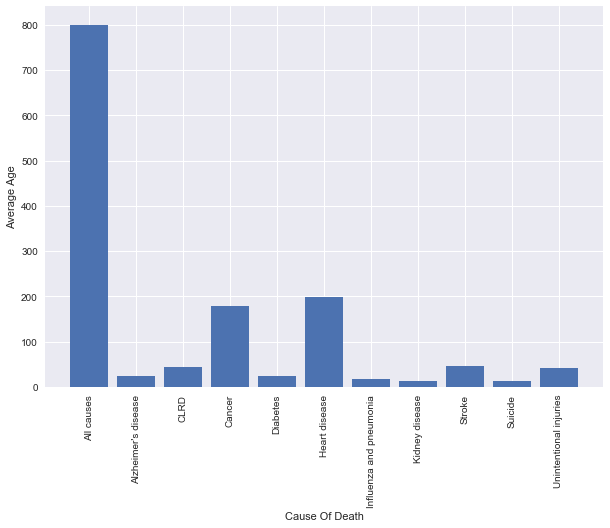

In [43]:
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(region.index)),group1.values)
plt.xticks(np.arange(len(region.index)), group1.index)
plt.xticks(rotation=90)
plt.ylabel('Average Age')
plt.xlabel('Cause Of Death')
plt.show()

**STEP 10: CLEANING DATA**  
  
**To see more from the data it has to be cleaned. Cleaning data is usally unique to each dataset.**  

**In this instance, we can see that many of the columns have commas where periods should be. To go about changing our data to a desirable format, we need to access the columns. Specifically, we need to remove spaces, brackets, symbols etc. 
Here, seems unnecessary 
**

In [32]:
print data.dtypes
print "\n"
display(HTML(data.describe().to_html()))

Year                         int64
113 Cause Name              object
Cause Name                  object
State                       object
Deaths                       int64
Age-adjusted Death Rate    float64
Cause_Name                  object
dtype: object




,Year,Deaths,Age-adjusted Death Rate
count,10296.000000,1.029600e+04,10296.000000
mean,2007.500000,1.532668e+04,128.026428
std,5.188379,1.112160e+05,224.355281
min,1999.000000,2.100000e+01,2.600000
25%,2003.000000,6.060000e+02,19.200000
50%,2007.500000,1.704500e+03,35.800000
75%,2012.000000,5.678000e+03,153.025000
max,2016.000000,2.712630e+06,1087.300000


**STEP 11: HEATMAP OF CORRELATION BETWEEN COLUMNS**  
  
**When two sets of data are strongly linked together we say they have a High Correlation. To see corr between all the columns, we use .corr()**

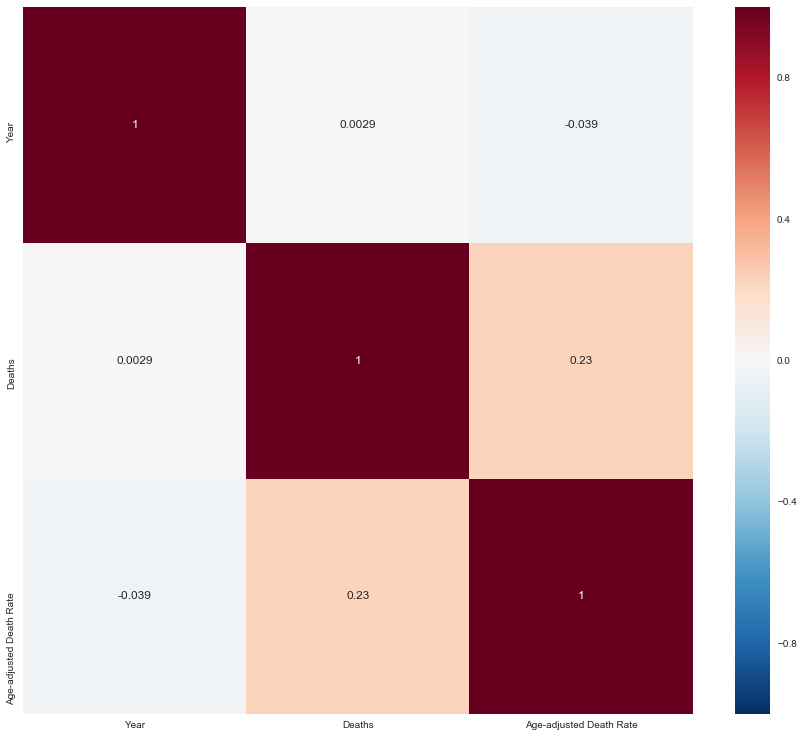

In [33]:
f,ax = plt.subplots(figsize=(15, 13))
sns.heatmap(data.corr(), annot=True, ax=ax)
plt.show()